In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#ignoring the warnings 
warnings.filterwarnings('ignore')

In [78]:
#Importing the '.csv' file under the variable "CarPrice"
Path= 'CarPrice_Assignment.csv' # Path variable,  Kindly change it to the appropriate path
CarPrice= pd.read_csv(Path)     

In [4]:
# The CarPrice dataset
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Extracting the Company name into a variable company
CarPrice['Company']= CarPrice.CarName.apply(lambda x: x.split(' ')[0])

In [6]:
# Checking if there are any null values
CarPrice.Company.describe()

count        205
unique        28
top       toyota
freq          31
Name: Company, dtype: object

In [7]:
#Checking for null values
CarPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Company             0
dtype: int64

In [8]:
#Checking the Column datatypes
CarPrice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# Listing the Categorical type variables
catg= ['Company', 'fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' ]
CarPrice[catg]

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [10]:
#Checking the values present in the fueltype variable
#Since there are only two types of values used it can be converted to a binary type variable
CarPrice.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [11]:
#Checking the values present in the aspiration variable
#Since there are only two types of values used it can be converted to a binary type variable
CarPrice.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [12]:
#Checking the values present in the doornumber variable
#Though the variable can easily be converted to a numeric type variable but since there are only two types of values used 
#it would be better to convert it to a binary type variable
CarPrice.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [13]:
#Checking the values present in the carbody variable
#The values would have to be converted to dummy variables
CarPrice.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [14]:
CarPrice.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [15]:
#Checking the values present in the enginelocation variable
#Since there are only two types of values used it can be converted to a binary type variable
CarPrice.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [16]:
#Checking the values present in the enginelocation variable
#The values would have to be converted to dummy variables
CarPrice.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [17]:
#Checking the values present in the cylindernumber variable

CarPrice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [18]:
#Checking the values present in the fuelsystem variable
#It would be better to convert it to a dummy type variable
CarPrice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [19]:
#list of all the categorical variables
catg_2= ['cylindernumber', 'CarName', 'Company', 'fueltype','aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem' ]


##  Visualising the Data

In [20]:
#list of all the columns which are numeric, i.e. they are not present in the 'catg_2' list
num_var= [x for x in CarPrice.columns if not(x in catg_2)]

#Removing car_ID from the list
num_var.remove('car_ID')

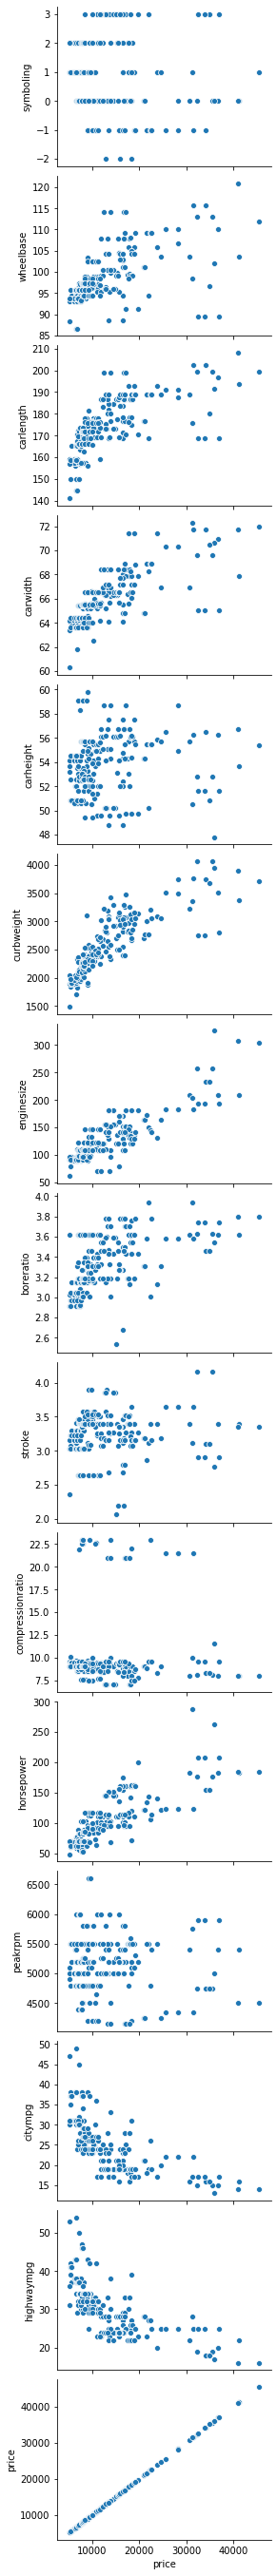

In [21]:
#Pairplot for all the numeric variables vs the price variables
sns.pairplot(x_vars= 'price', y_vars= num_var, data=CarPrice[num_var], height= 2.5, aspect= 1.5)

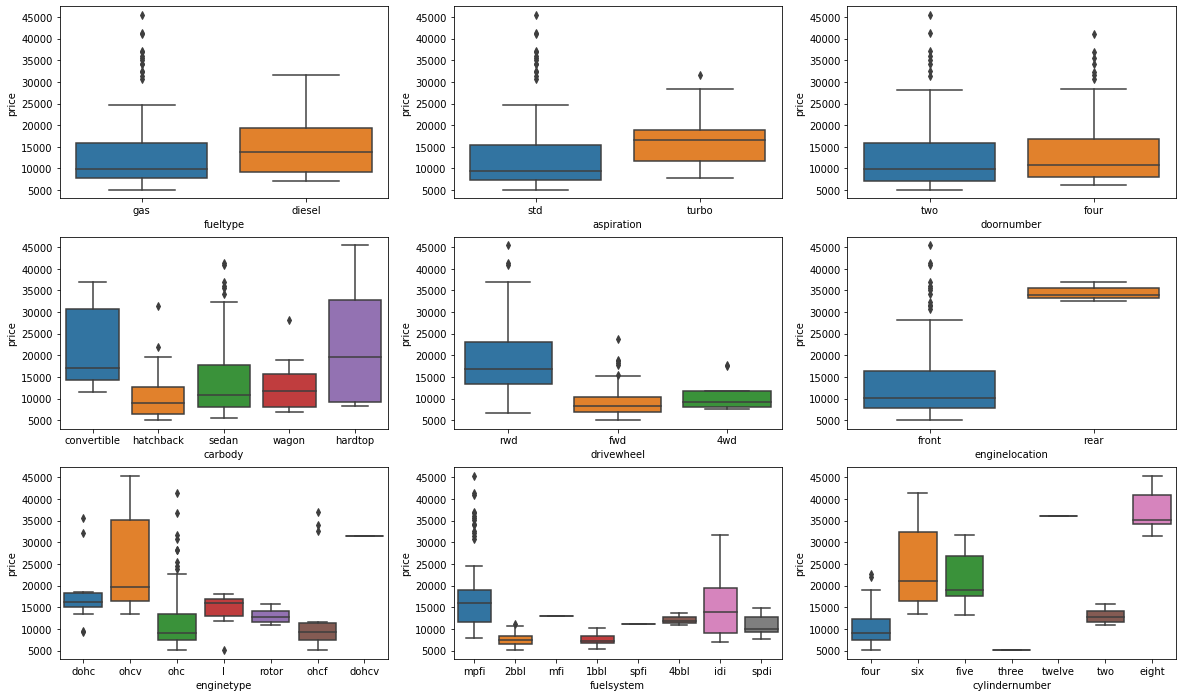

In [22]:
#Visualizing all the categorical variables against the price with the help of boxplots

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.subplot(3,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)

plt.show()

In [23]:
#Dropping values in categorical variables which are insignificant
# 'dohcv' from 'enginetype'
# 'mfi' and 'spfi' from 'fuelsystem'
# 'three' and 'twelve' from 'cylindernumber'
CarPrice.drop(CarPrice.loc[CarPrice.enginetype== 'dohcv'].index, axis= 0, inplace= True)
CarPrice.drop(CarPrice.loc[(CarPrice.fuelsystem== 'mfi')|(CarPrice.fuelsystem== 'spfi')].index, axis= 0, inplace= True)
CarPrice.drop(CarPrice.loc[(CarPrice.cylindernumber== 'three')|(CarPrice.cylindernumber== 'twelve')].index, axis= 0, inplace= True)
CarPrice.drop(['CarName', 'car_ID'], axis= 1, inplace= True)

In [24]:
#There are a few misspelled values which may pose a problem when converting them to dummy variables
CarPrice.Company.value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
buick           8
bmw             8
dodge           8
audi            7
plymouth        7
saab            6
porsche         3
isuzu           3
alfa-romero     3
maxda           2
vw              2
jaguar          2
renault         2
chevrolet       2
vokswagen       1
porcshce        1
mercury         1
Nissan          1
toyouta         1
Name: Company, dtype: int64

In [25]:
#Editing the misspleled values
CarPrice.Company.replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota','vokswagen': 'volkswagen','vw': 'volkswagen'}, inplace= True)

In [26]:
#The corrected values
CarPrice.Company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           8
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           3
alfa-romero     3
chevrolet       2
renault         2
jaguar          2
mercury         1
Name: Company, dtype: int64

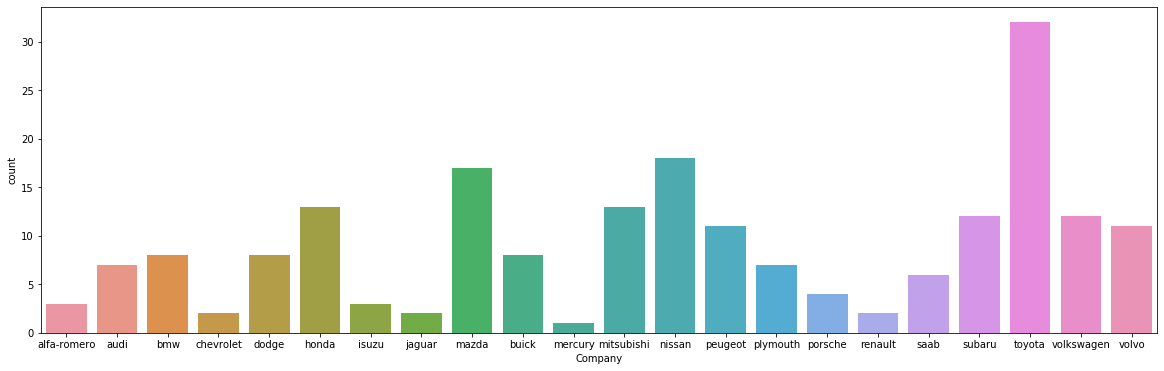

In [27]:
#countplot for the companies
plt.figure(figsize= (20,6))
sns.countplot(CarPrice['Company'])

# Preparing the Data

## Binary Variables

In [28]:
#listing the binary variables
bin_var= ['fueltype','aspiration','doornumber','enginelocation']
CarPrice[bin_var].head()

,fueltype,aspiration,doornumber,enginelocation
0,gas,std,two,front
1,gas,std,two,front
2,gas,std,two,front
3,gas,std,four,front
4,gas,std,four,front


In [29]:
#Mapping the binary variables
CarPrice['fueltype']= CarPrice.fueltype.map({'gas': 1, 'diesel':0})
CarPrice['aspiration']= CarPrice.aspiration.map({'std': 1, 'turbo':0})
CarPrice['doornumber']= CarPrice.doornumber.map({'two': 1, 'four':0})
CarPrice['enginelocation']= CarPrice.enginelocation.map({'front': 1, 'rear':0})


In [30]:
CarPrice[bin_var].head()

,fueltype,aspiration,doornumber,enginelocation
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,0,1
4,1,1,0,1


## Dummy variables

In [31]:
#Columns for which dummy variables must be created
dum_var= ['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'Company']
CarPrice[dum_var].head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,Company
0,convertible,rwd,dohc,four,mpfi,alfa-romero
1,convertible,rwd,dohc,four,mpfi,alfa-romero
2,hatchback,rwd,ohcv,six,mpfi,alfa-romero
3,sedan,fwd,ohc,four,mpfi,audi
4,sedan,4wd,ohc,five,mpfi,audi


In [32]:
#Dummy variables for carbody
dum_carbody= pd.get_dummies(CarPrice['carbody'], drop_first= True)
dum_carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [33]:
#Dummy variables for drivewheel
dum_drivewheel= pd.get_dummies(CarPrice['drivewheel'], drop_first= True)
dum_drivewheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [34]:
#Dummy variables for enginetype
dum_enginetype= pd.get_dummies(CarPrice['enginetype'], drop_first= True)
dum_enginetype.head()

,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0


In [35]:
#Dummy variables for cylindernumber
dum_cylindernumber= pd.get_dummies(CarPrice['cylindernumber'], drop_first= True)
dum_cylindernumber.head()

,five,four,six,two
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [36]:
#Dummy variables for fuelsystem
dum_fuelsystem= pd.get_dummies(CarPrice['fuelsystem'], drop_first= True)
dum_fuelsystem.head()

,2bbl,4bbl,idi,mpfi,spdi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [37]:
#Dummy variables for Company
dum_Company= pd.get_dummies(CarPrice['Company'], drop_first= True)
dum_Company.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Concatenating with original dataframe
CarPrice= pd.concat([CarPrice, dum_carbody, dum_enginetype, dum_cylindernumber, dum_drivewheel,dum_fuelsystem,dum_Company], axis= 1)
CarPrice.drop(dum_var, axis= 1, inplace= True)
CarPrice.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


# Splitting Data into Training and Testing Sets

In [39]:
#Setting the random seed so that the train and test data have the same rows, respectively
np.random.seed(0)

#Using a 70:30 split
CarPrice_train, CarPrice_test = train_test_split(CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling

In [40]:
#creating a MinMaxScaler object

scaler= MinMaxScaler()

In [41]:
#Applying the scaler to the numeric variables in the training set  

CarPrice_train[num_var]= scaler.fit_transform(CarPrice_train[num_var])

In [42]:
#Scaled numeric variables
CarPrice_train[num_var].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
78,0.8,0.188889,0.138783,0.200000,0.181818,0.074921,0.094017,0.307143,0.552381,0.15000,0.103226,0.551020,0.548387,0.647059,0.032982
3,0.8,0.414815,0.505703,0.389474,0.500000,0.224316,0.166667,0.464286,0.633333,0.18750,0.322581,0.551020,0.322581,0.411765,0.214771
190,1.0,0.218519,0.298479,0.157895,0.236364,0.172275,0.166667,0.464286,0.633333,0.09375,0.245161,0.551020,0.322581,0.382353,0.115650
27,0.6,0.188889,0.138783,0.136842,0.163636,0.158816,0.119658,0.350000,0.628571,0.03750,0.322581,0.551020,0.322581,0.411765,0.080146
94,0.6,0.218519,0.290875,0.136842,0.518182,0.051144,0.115385,0.435714,0.580952,0.15000,0.109677,0.428571,0.548387,0.617647,0.048712


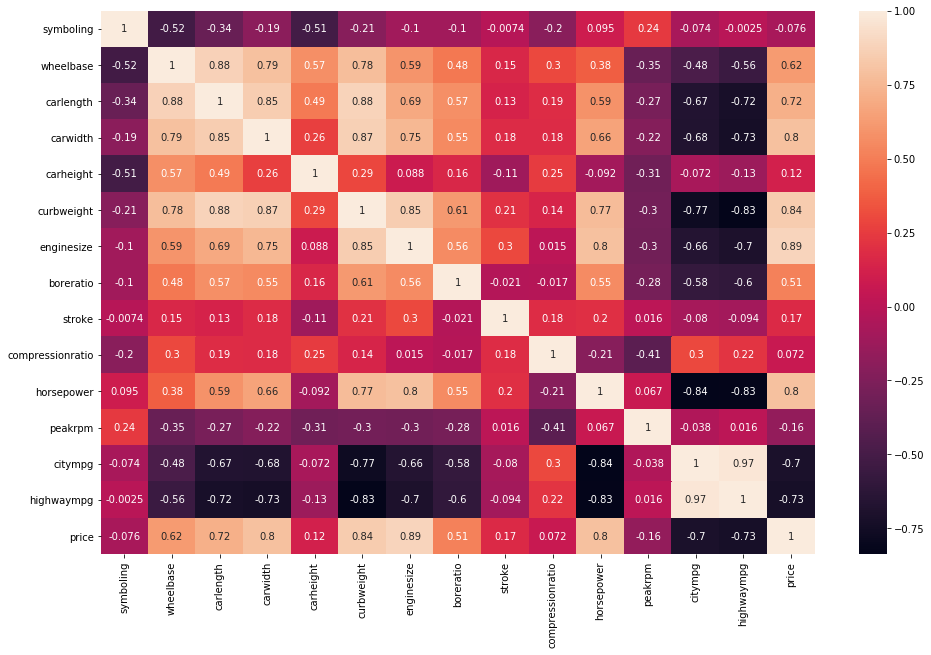

In [43]:
#Plotting a correlation matrix for the training set
plt.figure(figsize = (16, 10))
sns.heatmap(CarPrice_train[num_var].corr(), annot = True)
plt.show()

# Dividing into X and Y sets

In [44]:
y_train = CarPrice_train.pop('price')
X_train = CarPrice_train

# Model Building


In [45]:
# Fitting a Linear regression model with "LinearRegression"

#creating a LinearRegression() Object
lm = LinearRegression()

#fitting the X_train and y_train data
lm.fit(X_train, y_train)

#using RFE to select top 10 variables
rfe = RFE(lm, 10)  
rfe = rfe.fit(X_train, y_train)

In [46]:
#Listing the Rankings of all the variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('fueltype', False, 14),
 ('aspiration', False, 5),
 ('doornumber', False, 44),
 ('enginelocation', True, 1),
 ('wheelbase', False, 2),
 ('carlength', False, 10),
 ('carwidth', False, 27),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 33),
 ('stroke', True, 1),
 ('compressionratio', False, 26),
 ('horsepower', False, 32),
 ('peakrpm', True, 1),
 ('citympg', False, 4),
 ('highwaympg', True, 1),
 ('hardtop', False, 43),
 ('hatchback', False, 37),
 ('sedan', False, 40),
 ('wagon', False, 39),
 ('l', False, 3),
 ('ohc', False, 12),
 ('ohcf', False, 31),
 ('ohcv', False, 30),
 ('rotor', False, 35),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('two', False, 36),
 ('fwd', False, 45),
 ('rwd', False, 47),
 ('2bbl', False, 16),
 ('4bbl', False, 23),
 ('idi', False, 17),
 ('mpfi', False, 19),
 ('spdi', False, 21),
 ('audi', False, 41),
 ('bmw', True, 1),
 ('buick', False, 42),
 ('chevrolet', False, 

In [47]:
#listing the columns 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'curbweight', 'enginesize', 'stroke', 'peakrpm',
       'highwaympg', 'five', 'four', 'six', 'bmw'],
      dtype='object')

# Detailed statistics

In [48]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
#Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
#Running the Linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
# Summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           4.63e-63
Time:                        23:11:55   Log-Likelihood:                 202.39
No. Observations:                 140   AIC:                            -382.8
Df Residuals:                     129   BIC:                            -350.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2824      0.083      3.410      0.001       0.119       0.446
enginelocation    -0.2769      0.065     -4.238      0.000      -0.406      -0.148
curbweight         0.3777      0.058      6.496      0.000       0.263       0.493
enginesize         0.6442      0.071      9.091      0.000       0.504       0.784
stroke            -0.0839      0.037     -2.252      0.026      -0.158      -0.010
peakrpm            0.1314      0.033      3.942      0.000       0.065       0.197
highwaympg         0.1382      0.054      2.562      0.012       0.031       0.245
five              -0.0767      0.033     -2.308      0.023      -0.142      -0.011
four              -0.1659      0.028     -5.827      0.000      -0.222      -0.110
six               -0.1982      0.031     -6.391      0.000      -0.260      -0.137
bmw                0.2259      0.029      7.852      0.000       0.169       0.283
==============================================================================
Omnibus:                        7.122   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.062
Skew:                           0.430   Prob(JB):                       0.0293
Kurtosis:                       3.687   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above summary the model seems to be an good fit as the F statistic is practically 0
### R is 0.912 and the p value of all the variables is very low 

In [52]:
# Checking the VIF of the selected variables
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,272.18
2,curbweight,7.19
8,four,5.55
3,enginesize,5.48
6,highwaympg,4.43
9,six,4.07
7,five,2.36
5,peakrpm,1.52
10,bmw,1.35
4,stroke,1.28


#### we can see clearly that the const has a very high vif  so we must drop it 

In [53]:
X_train_rfe.drop('const', axis=1, inplace= True)

In [54]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,60.87
7,four,22.50
5,highwaympg,21.96
1,curbweight,20.37
3,stroke,18.20
2,enginesize,14.88
4,peakrpm,6.45
8,six,4.30
6,five,2.35
9,bmw,1.40


#### we can see clearly that the enginelocation has a very high vif so we must drop it 

In [55]:

X_train_rfe.drop('enginelocation', axis=1, inplace= True)

In [56]:
X_train_rfe.drop('four', axis=1, inplace= True)

In [57]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,16.97
1,enginesize,14.51
0,curbweight,12.04
4,highwaympg,6.92
3,peakrpm,4.89
6,six,2.13
7,bmw,1.34
5,five,1.24


#### we can see clearly that the four(cylinder) has a very high vif so we must drop it 

In [61]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,16.97
1,enginesize,14.51
0,curbweight,12.04
4,highwaympg,6.92
3,peakrpm,4.89
6,six,2.13
7,bmw,1.34
5,five,1.24


#### we can see clearly that the stroke has a very high vif so we must drop it


In [62]:
X_train_rfe.drop('stroke', axis=1, inplace= True)

In [63]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,13.20
0,curbweight,11.54
2,peakrpm,4.17
3,highwaympg,3.57
5,six,2.12
6,bmw,1.33
4,five,1.21


#### we can see clearly that the enginesize has a very high vif so we must drop it


In [64]:
X_train_rfe.drop('enginesize', axis=1, inplace= True)

In [65]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.17
2,highwaympg,3.36
0,curbweight,2.60
4,six,1.87
5,bmw,1.33
3,five,1.21


#### All of the remaining variables have a VIF below 5 and hence can be accepted

In [66]:
#Refitting the model
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              185.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    2.77e-62
Time:                        23:12:26   Log-Likelihood:                          137.95
No. Observations:                 140   AIC:                                     -263.9
Df Residuals:                     134   BIC:                                     -246.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
curbweight     0.5841      0.032     18.392      0.000       0.521       0.647
peakrpm        0.0697      0.036      1.944      0.054      -0.001       0.141
highwaympg    -0.0814      0.030     -2.679      0.008      -0.142      -0.021
five           0.0484      0.036      1.348      0.180      -0.023       0.119
six            0.0411      0.031      1.345      0.181      -0.019       0.102
bmw            0.2081      0.043      4.783      0.000       0.122       0.294
==============================================================================
Omnibus:                       70.418   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.925
Skew:                           1.667   Prob(JB):                     1.08e-91
Kurtosis:                      10.791   Cond. No.                         4.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p value for six(cylinder) and five(cylinder) is high which makes sense as we had dropped the four(cylinder) value
#### earlier as it had a high VIF

In [67]:
#dropping the values 'five' and 'six'
X_train_rfe.drop('five', axis=1, inplace= True)
X_train_rfe.drop('six', axis=1, inplace= True)

In [68]:
#Refitting the model
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              274.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                    4.36e-64
Time:                        23:12:28   Log-Likelihood:                          136.41
No. Observations:                 140   AIC:                                     -264.8
Df Residuals:                     136   BIC:                                     -253.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
curbweight     0.6117      0.027     22.484      0.000       0.558       0.666
peakrpm        0.0771      0.036      2.164      0.032       0.007       0.148
highwaympg    -0.0929      0.030     -3.123      0.002      -0.152      -0.034
bmw            0.2292      0.039      5.835      0.000       0.152       0.307
==============================================================================
Omnibus:                       61.370   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.123
Skew:                           1.457   Prob(JB):                     1.37e-69
Kurtosis:                       9.773   Cond. No.                         3.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p values are below 5% and the F statistic is practically 0
#### The R value is 0.89 

In [69]:
#Calculating the vif 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,4.09
2,highwaympg,3.20
0,curbweight,1.90
3,bmw,1.08


#### The VIF for all the values are also below 5

# Residual Analysis of the train data

In [70]:
#Calculating the train price
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

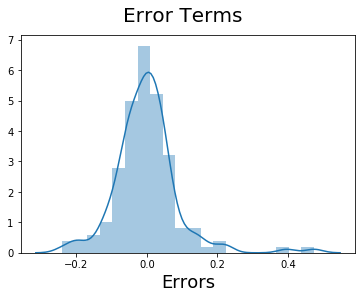

In [71]:
#Plotting a histogram to confirm that the residuals follow a normal distribution
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   

#### Clearly the distribution is normal

# Predictions

In [72]:
#Scaling the test variables with the scaler.transform() function
CarPrice_test[num_var] = scaler.transform(CarPrice_test[num_var])

In [73]:
# Dividing into X_test and y_test
y_test = CarPrice_test.pop('price')
X_test = CarPrice_test

In [74]:
X_test_rfe= X_test[X_train_rfe.columns]

In [75]:
y_pred = lm.predict(X_test_rfe)


# Model Evaluation


Text(0, 0.5, 'y_pred')

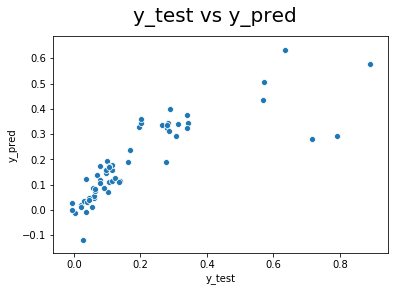

In [76]:
fig = plt.figure()
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test')                         
plt.ylabel('y_pred')

In [77]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred), 2)

0.69

### The model Accurately explains 69 % of the test values 

# The final model equation is
# price= 0.6117*(curbweight) + 0.0771*(peakrpm) - 0.0929*(highwaympg)	

## #0.2081	gets added to the price if the car is a bmw